In [1]:
import os
import zipfile
import time
import requests

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import fiona
import geopandas as gpd
from momepy import close_gaps, extend_lines

from sqlalchemy import create_engine

# set up database
user = os.environ.get('DB_USERNAME')
pwd = os.environ.get('DB_PASSWORD')
host = os.environ.get('DB_HOSTNAME')
port = os.environ.get('DB_PORT')

db_connection_url = f"postgres+psycopg2://{user}:{pwd}@{host}:{port}/geodemo"
engine = create_engine(db_connection_url)

In [2]:
def pgselect(table, buffer=400, x=338286, y=392077):
    user = os.environ.get('DB_USERNAME')
    pwd = os.environ.get('DB_PASSWORD')
    host = os.environ.get('DB_HOSTNAME')
    port = os.environ.get('DB_PORT')

    url = f"postgres+psycopg2://{user}:{pwd}@{host}:{port}/geodemo"
    engine = create_engine(url)
    sql = f'SELECT * FROM {table} WHERE ST_DWithin(geometry, ST_SetSRID(ST_Point({x}, {y}), 27700), {buffer})'
    return gpd.read_postgis(sql, engine, geom_col='geometry')

In [3]:
sql = '''SELECT table_name
  FROM information_schema.tables
 WHERE table_schema='public'
   AND table_type='BASE TABLE';'''

tables = pd.read_sql(sql, engine).table_name

print(tables)

0                       spatial_ref_sys
1                             opennames
2                            openrivers
3                             openroads
4                          boundaryline
5                          openmaplocal
6                        opengreenspace
7                              openuprn
8                              opentoid
9     boundary_line_ceremonial_counties
10      boundary_line_historic_counties
11                       community_ward
12                       country_region
13                               county
14            county_electoral_division
15             district_borough_unitary
16        district_borough_unitary_ward
17                       english_region
18                 greater_london_const
19                           high_water
20             historic_european_region
21                               parish
22            polling_districts_england
23             scotland_and_wales_const
24            scotland_and_wales_region


In [8]:
rivers = pgselect('rivers', 100000)

<AxesSubplot:>

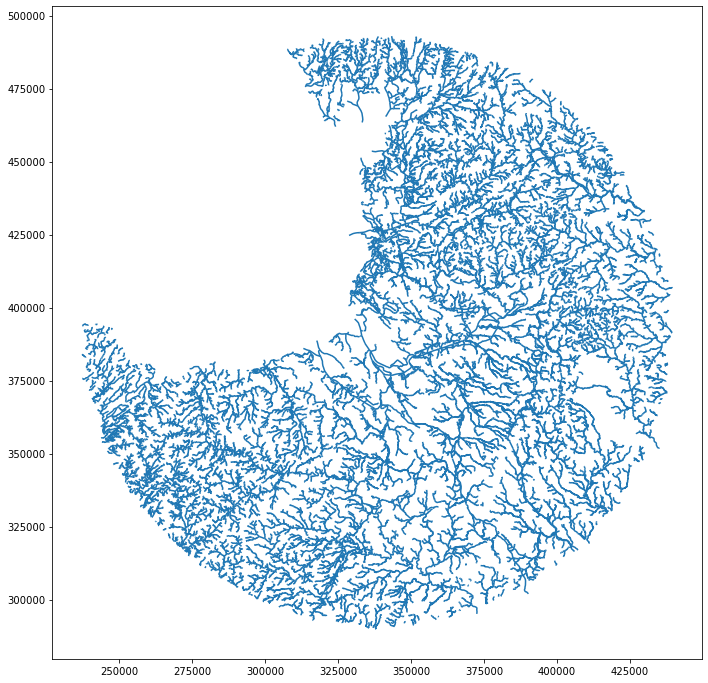

In [11]:
f, ax = plt.subplots(figsize=(12,12))
rivers.plot(ax=ax)

In [12]:
nodes = pgselect('roadnodes')
roads = pgselect('openroads')
bgs = pgselect('openmaplocal')
prs = pgselect('openuprn')

In [18]:
x = (nodes, roads, bgs, prs, rlw)

In [16]:
rlw = pgselect('railways')

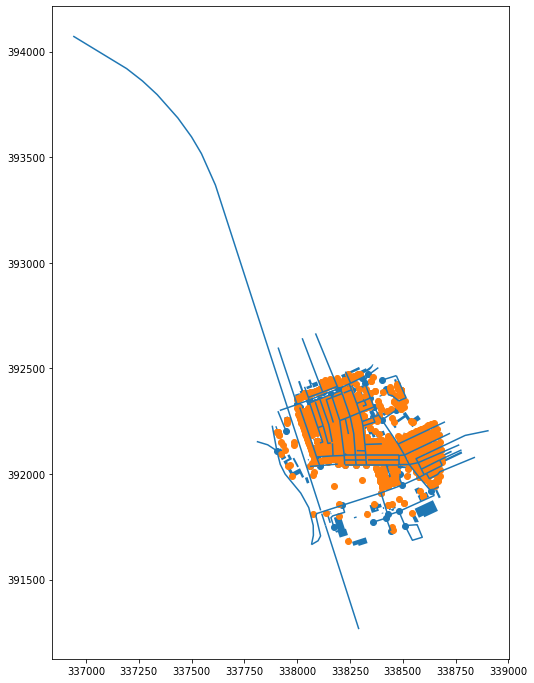

In [19]:
f, ax = plt.subplots(figsize=(12,12))
for i in x:
    i.plot(ax=ax)